In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score

In [2]:
df_train = pd.read_csv("./data/CNDtrain.csv") 

In [9]:
df_train.shape

(407, 3)

In [4]:
df_test = pd.read_csv("./data/CNDtest.csv") 

In [5]:
df_test.tail()

,fileName,MessageID,CND
43,CN072T6DFCP006C4011RA10,VDR32 VDR32 VDR32 VDR32 VDR32 VDR32 SYS1003 LO...,0
44,CN072T6DFCP006BQ0049A10,SYS1003 LOG007 UEFI0061 UEFI0062 SYS1001 SYS10...,0
45,CN072T6DFCP006AT01JWA10-CND-100%-MEM issue,SYS1003 LOG007 UEFI0061 UEFI0062 SYS1001 SYS10...,0
46,CN072T6DFCP006B100CIA10,VDR33 VDR32 SYS1003 LOG007 UEFI0061 UEFI0062 U...,0
47,CN072T6DFCP0065I00UZA10,SYS1003 LOG007 UEFI0061 UEFI0062 SYS1001 SYS10...,0


In [6]:
# df_test = pd.read_csv("./data/CNDtest.csv") 

df_2023 = pd.read_csv("./data/CND2023.csv") 

In [37]:
import numpy as np
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt


In [35]:
df = pd.concat([df_train, df_test, df_2023])

In [14]:
X_train, y_train = df["MessageID"], df["CND"]

In [15]:
vectorizer = TfidfVectorizer(
    encoding="uft-8",
    decode_error="ignore"
)

In [16]:
X_train_vec = vectorizer.fit_transform(X_train)

In [17]:
vectorizer_dir = f'./model/tfidf_all.joblib'

In [18]:
from joblib import dump, load
dump(vectorizer, vectorizer_dir)

['./model/tfidf_all.joblib']

In [19]:
vectorizer.get_feature_names_out()

array(['amp0302', 'amp0303', 'amp0305', 'asr0000', 'asr0001', 'bar001',
       'bar002', 'bar003', 'bar004', 'bar005', 'bar006', 'bar007',
       'bar059', 'bar060', 'bar061', 'bar062', 'bar063', 'bar064',
       'bar065', 'bar099', 'bar103', 'bat0000', 'bat0001', 'bat0002',
       'bat0015', 'bat0016', 'bat0017', 'bat0021', 'bat1008', 'bat1009',
       'bat1025', 'bat1029', 'bat1033', 'bat1034', 'cert331', 'cpu0000',
       'cpu0001', 'cpu0005', 'cpu0010', 'cpu0012', 'cpu0016', 'cpu0704',
       'cpu9000', 'cpua0023', 'ctl1', 'ctl100', 'ctl103', 'ctl104',
       'ctl105', 'ctl106', 'ctl107', 'ctl108', 'ctl109', 'ctl11',
       'ctl110', 'ctl111', 'ctl112', 'ctl129', 'ctl13', 'ctl34', 'ctl35',
       'ctl37', 'ctl38', 'ctl41', 'ctl48', 'ctl57', 'ctl75', 'ctl97',
       'diag0000', 'diag0114', 'diag0125', 'diag0141', 'diag0142',
       'diag0251', 'diag0415', 'diag8007', 'diag8170', 'dis001', 'dis002',
       'dis003', 'dis004', 'dis010', 'dis111', 'dis115', 'dkm0001',
       'enc18', '

In [20]:
len(vectorizer.get_feature_names_out())

694

In [21]:
# from xgboost import XGBClassifier

# xgb_clf = XGBClassifier(
#     # max_depth=12,
#     # learning_rate=1e-4,
#     # n_estimators=500,
#     random_state=42
# )

In [62]:
from sklearn.svm import SVC
svc_clf = SVC(probability=True)

In [63]:
param_grid = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Kernel types
    'gamma': ['scale', 'auto', 0.1, 1.0]  # Kernel coefficient (only for some kernel types)
}

In [64]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=svc_clf, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

In [65]:
grid_search.fit(X_train_vec, y_train)

GridSearchCV(cv=5, estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10],
                         'gamma': ['scale', 'auto', 0.1, 1.0],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy')

In [66]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_

In [67]:
print(best_params, best_score)

{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'} 0.6638745704467355


In [68]:
model_dir = f'./model/{grid_search.best_estimator_.__class__.__name__}_all.joblib'

In [69]:
from joblib import dump, load
dump(grid_search.best_estimator_, model_dir)

['./model/SVC_all.joblib']

In [70]:
clf = load(model_dir) 

In [71]:
X_train_pred = clf.predict(X_train_vec)

In [72]:
X_train_acc = accuracy_score(y_train, X_train_pred)

In [73]:
X_train_acc

0.970954356846473

In [74]:
trancatedSVD = TruncatedSVD(n_components=2, random_state=42)

# Fit and transform your data
reduced_data = trancatedSVD.fit_transform(X_train_vec)

In [75]:
trancatedSVD.explained_variance_ratio_

array([0.03201413, 0.13108077])

In [40]:
# https://www.analyticsvidhya.com/blog/2018/10/stepwise-guide-topic-modeling-latent-semantic-analysis/

In [45]:
from matplotlib.colors import ListedColormap
from sklearn.inspection import DecisionBoundaryDisplay
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])


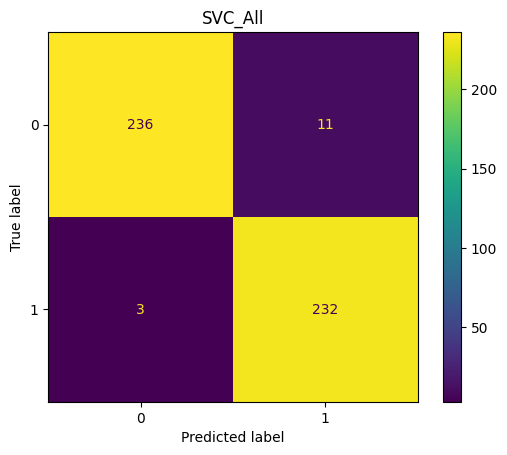

In [90]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix


cm = confusion_matrix(y_train, X_train_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()
plot_name = f"{grid_search.best_estimator_.__class__.__name__}_All"
plt.title(plot_name)
plt.savefig(f"./charts/{plot_name}_Confusion_Matrix.png")

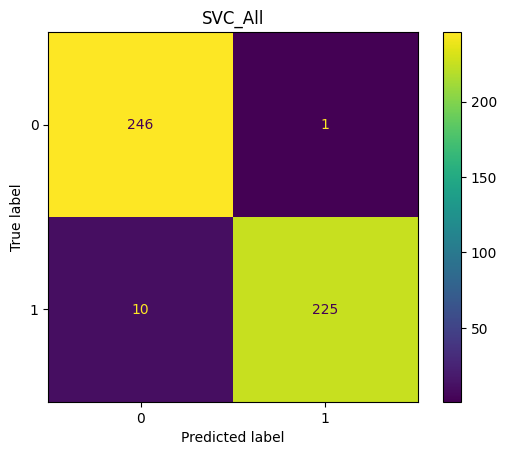

In [93]:
threshold = 0.65
cm = confusion_matrix(y_train, (clf.predict_proba(X_train_vec)[:,1] >= threshold).astype(int))

cm_display = ConfusionMatrixDisplay(cm).plot()
plot_name = f"{grid_search.best_estimator_.__class__.__name__}_All"
plt.title(plot_name)
plt.savefig(f"./charts/{plot_name}_threshold_{threshold}_Confusion_Matrix.png")

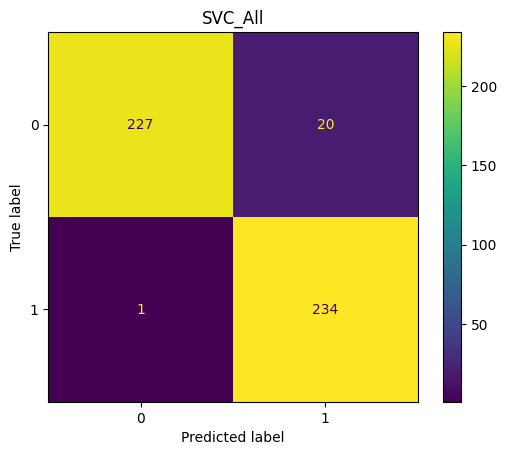

In [94]:
threshold = 0.25
cm = confusion_matrix(y_train, (clf.predict_proba(X_train_vec)[:,1] >= threshold).astype(int))

cm_display = ConfusionMatrixDisplay(cm).plot()
plot_name = f"{grid_search.best_estimator_.__class__.__name__}_All"
plt.title(plot_name)
plt.savefig(f"./charts/{plot_name}_threshold_{threshold}_Confusion_Matrix.png")

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix


cm = confusion_matrix(y_train, clf.predict_prob(X_train) >)

cm_display = ConfusionMatrixDisplay(cm).plot()
plot_name = f"{grid_search.best_estimator_.__class__.__name__}_All"
plt.title(plot_name)
plt.savefig(f"./charts/{plot_name}_Confusion_Matrix.png")

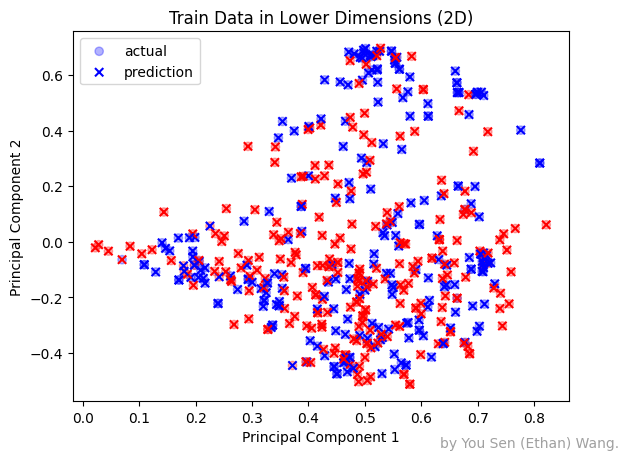

In [46]:
import matplotlib.pyplot as plt
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=y_train, cmap=cm_bright, alpha=0.3)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=X_train_pred, cmap=cm_bright, marker="x")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Train Data in Lower Dimensions (2D)')
plt.legend(["actual", "prediction"])
plt.text(0.95, -0.75, 'by You Sen (Ethan) Wang.',
             fontsize=10, color='gray',
             ha='right', va='bottom', alpha=0.75)
plt.savefig(f"./charts/{grid_search.best_estimator_.__class__.__name__}_all_actual_vs_pred.png")
plt.show()

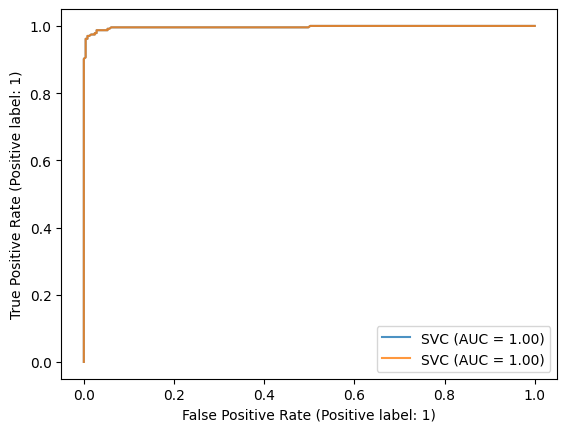

In [47]:
from sklearn.metrics import RocCurveDisplay
ax = plt.gca()
rfc_disp = RocCurveDisplay.from_estimator(clf, X_train_vec, y_train, ax=ax, alpha=0.8)
rfc_disp.plot(ax=ax, alpha=0.8)

In [48]:
from sklearn.metrics import f1_score
f1_score(y_train, X_train_pred)

0.9707112970711297

In [49]:
from sklearn.metrics import classification_report
print(classification_report(y_train, X_train_pred))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97       247
           1       0.95      0.99      0.97       235

    accuracy                           0.97       482
   macro avg       0.97      0.97      0.97       482
weighted avg       0.97      0.97      0.97       482



In [50]:
# pd.Series(grid_search.best_estimator_.feature_importances_, index = vectorizer.get_feature_names_out()).nlargest(12).plot(kind = 'barh',
#                                                                                figsize = (10, 10),
#                                                                               title = 'Feature importance from XGBoost').invert_yaxis();

In [108]:
# https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html#building-a-pipeline

In [51]:
# from keras.models import Sequential
# from keras.layers import Dense

In [52]:
pip show scikit-learn

Name: scikit-learn
Version: 1.3.0
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /usr/local/lib/python3.10/site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: pynndescent, sentence-transformers, umap-learn
Note: you may need to restart the kernel to use updated packages.
